<ipython-input-351-43798fe4b465>:16: RuntimeWarning: invalid value encountered in sqrt
  G2 = np.sqrt((20000*432*I)/(B*43.2 - 432*I))
<ipython-input-351-43798fe4b465>:17: RuntimeWarning: invalid value encountered in sqrt
  G3 = np.sqrt((a*432*I)/(300*43.2 - 432*I))


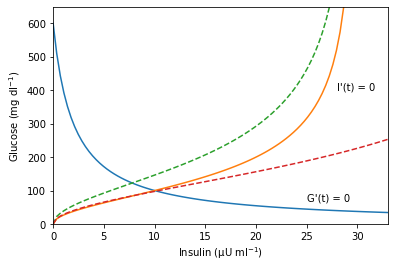

In [351]:
# fast subsystem behaviour

import numpy as np
import matplotlib.pyplot as plt

I = np.linspace(0, 35, 100)

B = 300

a = sp.symbols('a')
a = sp.solve(1/0.72 * (864/122.5 - 1.44) - 1/432 * ((300 * 43.2 * (122.5 ** 2)) / (a + (122.5 **2) )), a)
a=float(a[0])

# Define the equations
G1 = 864/(1.44 + 0.72*I)
G2 = np.sqrt((20000*432*I)/(B*43.2 - 432*I))
G3 = np.sqrt((a*432*I)/(300*43.2 - 432*I))
G4 = np.sqrt((a*432*I)/(550*43.2 - 432*I))

# Plot the equations
plt.plot(I, G1)
plt.plot(I, G2)
plt.plot(I, G3, linestyle = 'dashed')
plt.plot(I, G4, linestyle = 'dashed')

# Add labels and a legend
plt.xlabel('Insulin ($\mathregular{μU\ ml^{-1}}$)')
plt.ylabel('Glucose ($\mathregular{mg\ dl^{-1}}$)')
plt.xlim(0, 33)
plt.ylim(0, 650)

plt.text(25, 70, "G'(t) = 0")
plt.text(28, 400, "I'(t) = 0")


# Show the plot
plt.savefig('graph1.png',bbox_inches='tight',dpi=400)
plt.show()

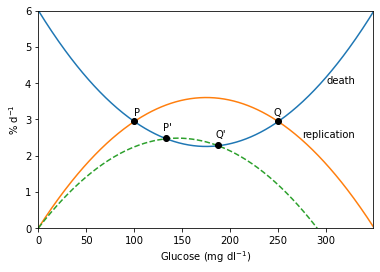

In [29]:
# slow subsystem behaviour

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

G = np.linspace(0, 400, 400)
r1 = 0.77e-3
d = 1.17551020408163e-6
c = 350*1.17551020408163e-6

ds = sp.symbols('ds')
ds = sp.solve(0.0375 - 175*(r1 - 350*ds) + (175**2)*(0.24e-5 - ds), ds)
ds = ds[0]
cs = 350*ds

a = 0.84e-3 - c
b = 0.24e-5 - d

B1 = 100*(0.06 - (0.84e-3 - 350 * d) * G + (0.24e-5 - d) * (G**2))
B2 = 100*(350 * d * G - d * (G**2))
B3 = 100*((r1 - a) * G - d * (G**2))

# Plot the equations
plt.plot(G, B1, label="Death Rate of β-cells")
plt.plot(G, B2, label="Replication Rate of β-cells")
plt.plot(G, B3, label="Replication Rate of β-cells blabla", linestyle = 'dashed')

plt.plot(100, 2.95, "ko")
plt.plot(133, 2.47, "ko")
plt.plot(250, 2.95, "ko")
plt.plot(187, 2.3, "ko")

plt.text(100, 3.1, 'P')
plt.text(130, 2.7, "P'")
plt.text(245, 3.1, 'Q')
plt.text(185, 2.5, "Q'")


plt.text(300, 4, 'death')
plt.text(275, 2.5, 'replication')

# Add labels and a legend
plt.xlabel('Glucose ($\mathregular{mg\ dl^{-1}}$)')
plt.ylabel('% $\mathregular{d^{-1}}$')
plt.xlim(0, 349)
plt.ylim(0, 6)


# Show the plot
plt.savefig('graph2.png',bbox_inches='tight',dpi=400)
plt.show()